In [ ]:
!pip install qiskit --quiet --no-warn-conflicts
!pip install pylatexenc --quiet --no-warn-conflicts


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 9.8 MB/s eta 0:00

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile

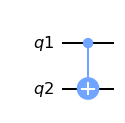

In [ ]:
#creating oracle
q1 = QuantumRegister(1, "q1")
q2 = QuantumRegister(1, "q2")


oracle = QuantumCircuit(q1, q2)

par = 1 #(par = 0 - constant func(Id for example), par = 1 - balanced func(CNOT for example))
if par == 1:
  oracle.cx(0, 1)


oracle.draw()
oracle.draw('mpl')


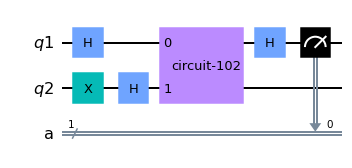

In [ ]:

q1 = QuantumRegister(1, "q1")
q2 = QuantumRegister(1, "q2")
A = ClassicalRegister(1, "a")

circuit = QuantumCircuit(q1, q2, A)
circuit.h(q1)
circuit.x(q2)
circuit.h(q2)
circuit.append(oracle, range(2))
circuit.h(q1)
circuit.measure(q1, A)


circuit.draw()
circuit.draw('mpl')

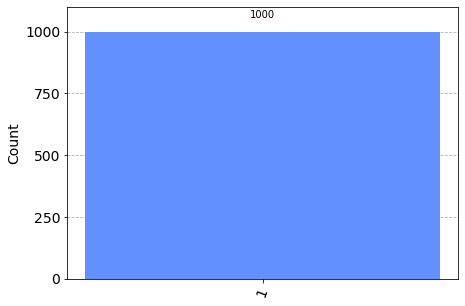

In [ ]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

simulator = AerSimulator()
circuit_simulator = simulator.run(transpile(circuit,simulator), shots=1000)
statistics = circuit_simulator.result().get_counts()
plot_histogram(statistics)

In [ ]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

In [ ]:
IBMQ.save_account('fbad2813d7db094b227a82658e29c649d70a4e662aee8d4fdae0ad4ba5ee87aaa27ec81ec35a2eeaa8229abdb597cc5ad7108e2b564694b74942d086d0799807', overwrite=True)

<ipython-input-25-9254ce947d52>:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('fbad2813d7db094b227a82658e29c649d70a4e662aee8d4fdae0ad4ba5ee87aaa27ec81ec35a2eeaa8229abdb597cc5ad7108e2b564694b74942d086d0799807', overwrite=True)


In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))
print("least busy backend: ", backend)

least busy backend:  ibmq_jakarta


In [ ]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


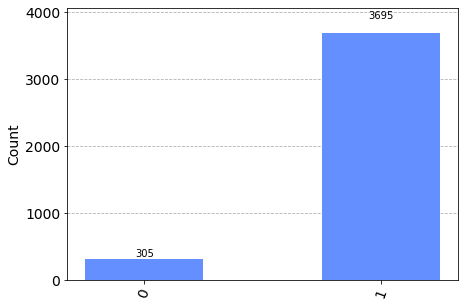

In [ ]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)